In [1]:
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
enrollment <- read.csv("Downloads/collegeenrollmentredux.csv")

In [3]:
head(enrollment)


,College,Degree,MajorCode,MajorName,RaceGender,Race,Gender,Count,Total
1,College of Agri Sci and Natl Resources,B1BC,BIOC,Biochemistry,NonResidentAlienMale,NonResidentAlien,Male,3,97
2,College of Agri Sci and Natl Resources,B1AS,ASCI,Animal Science,NonResidentAlienMale,NonResidentAlien,Male,0,338
3,College of Agri Sci and Natl Resources,B1FW,FWL,Fisheries and Wildlife,NonResidentAlienMale,NonResidentAlien,Male,0,191
4,College of Agri Sci and Natl Resources,B1AP,APSC,Applied Science,NonResidentAlienMale,NonResidentAlien,Male,1,71
5,College of Agri Sci and Natl Resources,B1HO,HORT,Horticulture,NonResidentAlienMale,NonResidentAlien,Male,1,52
6,College of Agri Sci and Natl Resources,B1ED,AEDU,Agricultural Education,NonResidentAlienMale,NonResidentAlien,Male,0,103


In [4]:
sapply(enrollment, mode)


College     Degree  MajorCode  MajorName RaceGender       Race     Gender 
 "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric" 
     Count      Total 
 "numeric"  "numeric"

So let's narrow our data down a bit. The dplyr library creates verbs in R that should be very familiar to you. One is filter. It does what it says on the tin. We'll filter our data down to the College of Journalism and Mass Communications, or as the database calls it "& Mass Comm".
We'll start by creating a new data frame, then use filter(name of source data frame, filter condition).


In [5]:
cojmc <- filter(enrollment, College == "College of Journalism & Mass Comm")


Now we can visualize it. Let's use a stacked bar chart. The difference between what you have here and what you did in Python is, again, vanishingly small. The major difference -- MAJOR -- is that you no longer put field names in quotes. THAT'S IT! That's all.


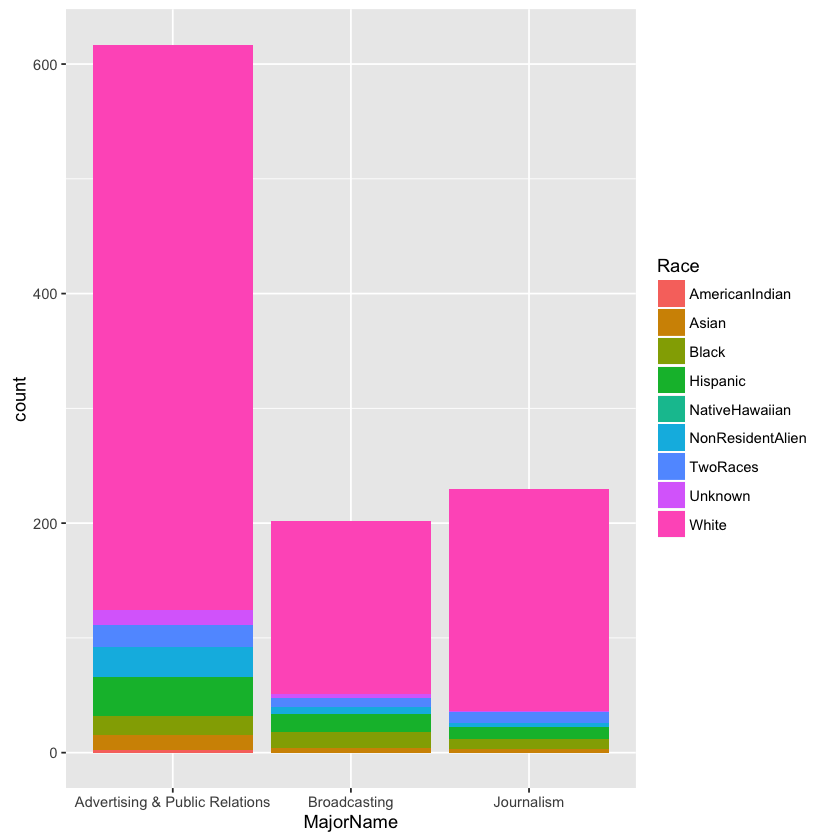

In [6]:
ggplot(cojmc, aes(MajorName, weight=Count, fill=Race)) + geom_bar()


Let's do the same thing, except for the 10 largest majors on campus. I took a quick look at the data and figured out that the 10 largest majors on campus have more than 500 people in them total. So that's what our filter condition will be.


In [7]:
largest <- filter(enrollment, Total > 500)


And if we visualize that in the same way, except flipping the bars sideways, this is what we get:


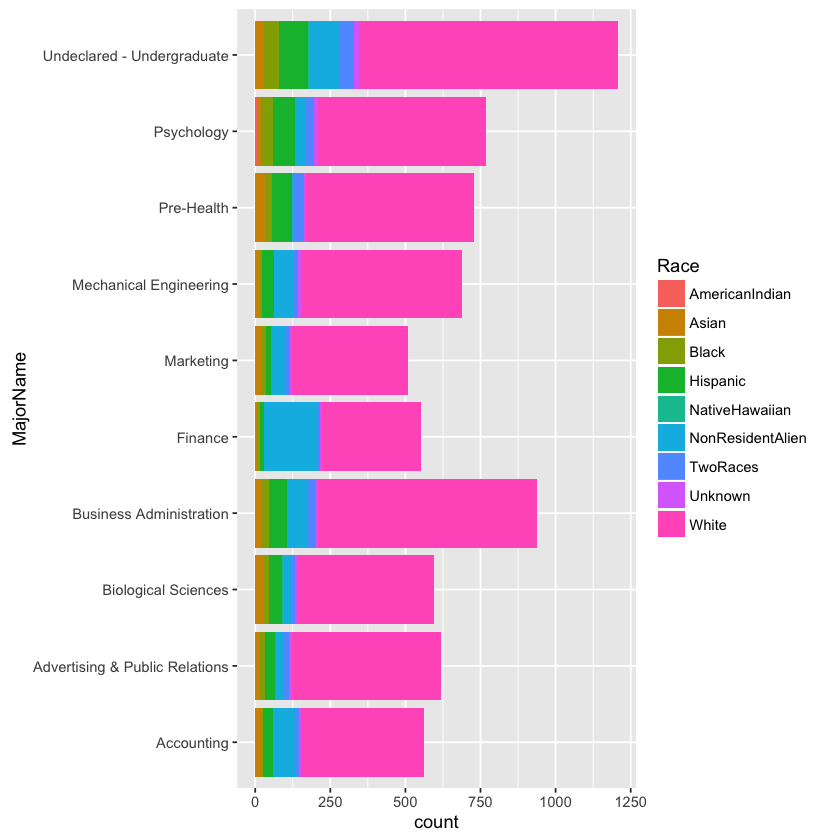

In [8]:
ggplot(largest, aes(MajorName, weight=Count, fill=Race)) + geom_bar() + coord_flip()


If we wanted to map the percentages of the races within each of the 10 largest majors, we could create that column from our existing data. We have the Count and the Total of each Race and Gender Combination, so we can create a new field and calculate that. Whenever we want to change our data frame, we use dplyr's mutate function. You call mutate then the data frame you are mutating, the new field you are creating, and then a formula of some variety to fill it in.


In [9]:
pctlargest <- mutate(largest, Percent = (Count / Total)*100)


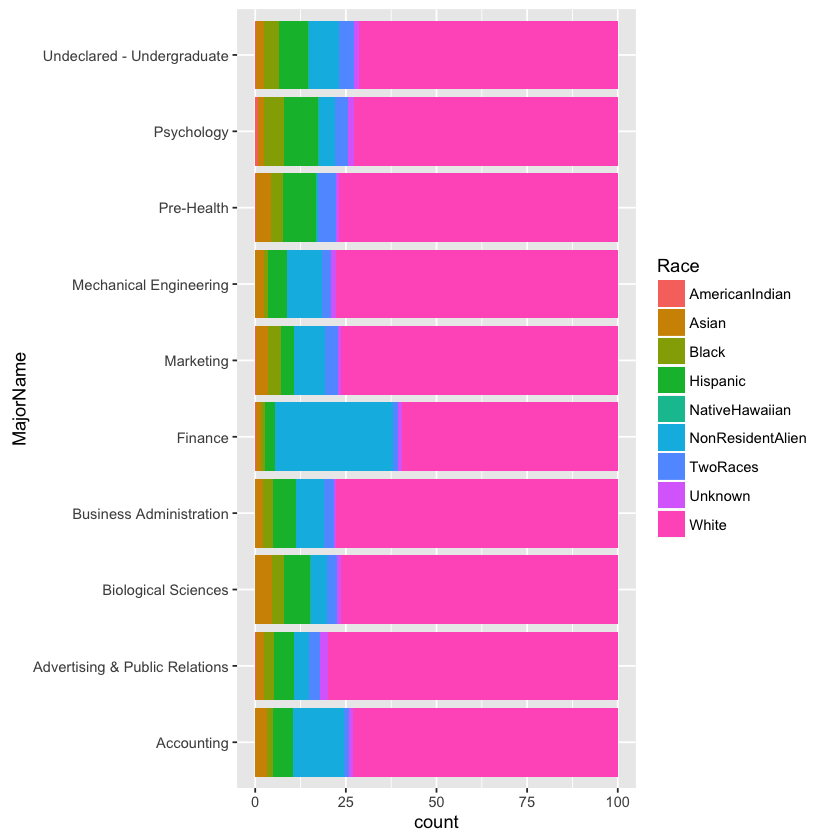

In [10]:
ggplot(pctlargest, aes(MajorName, weight=Percent, fill=Race)) + geom_bar() + coord_flip()


But what if we wanted our bar chart of largest majors to be in order of major? We can use arrage for that. But, there's a bit more magic that has to go on. To make the arrage stick, we have to mutate the data frame and make the order permanent by refactoring the label you'll use.

Here is an example of how to do this. This will also introduce another neat trick in dplyr: The %>%. That allows you to chain commands together, so you don't have to run a new cell every time, or create new data frames every time. So I can create a new data frame, sort it and mutate it all in one go. I can even chart it in the same go if I want.


In [11]:
largestsorted <- arrange(largest, desc(Total)) %>% mutate(MajorName = factor(MajorName, MajorName))


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

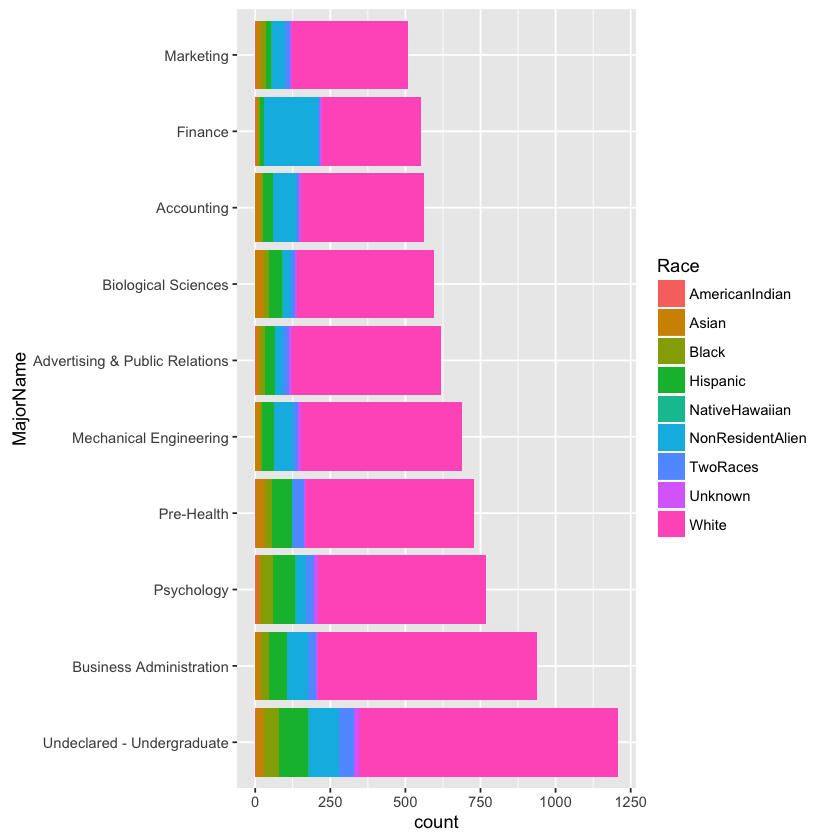

In [12]:
ggplot(largestsorted, aes(MajorName, weight=Count, fill=Race)) + geom_bar() + coord_flip()


In [35]:
drugs <- read.csv("Desktop/UNLcrime/Downloads/drugcrimes.csv")

In [36]:
head(drugs)

,year,type,count,total
1,2011,Drugs,122,1948
2,2012,Drugs,91,1881
3,2013,Drugs,122,2052
4,2014,Drugs,163,1920
5,2015,Drugs,208,1956
6,2016,Drugs,217,1506


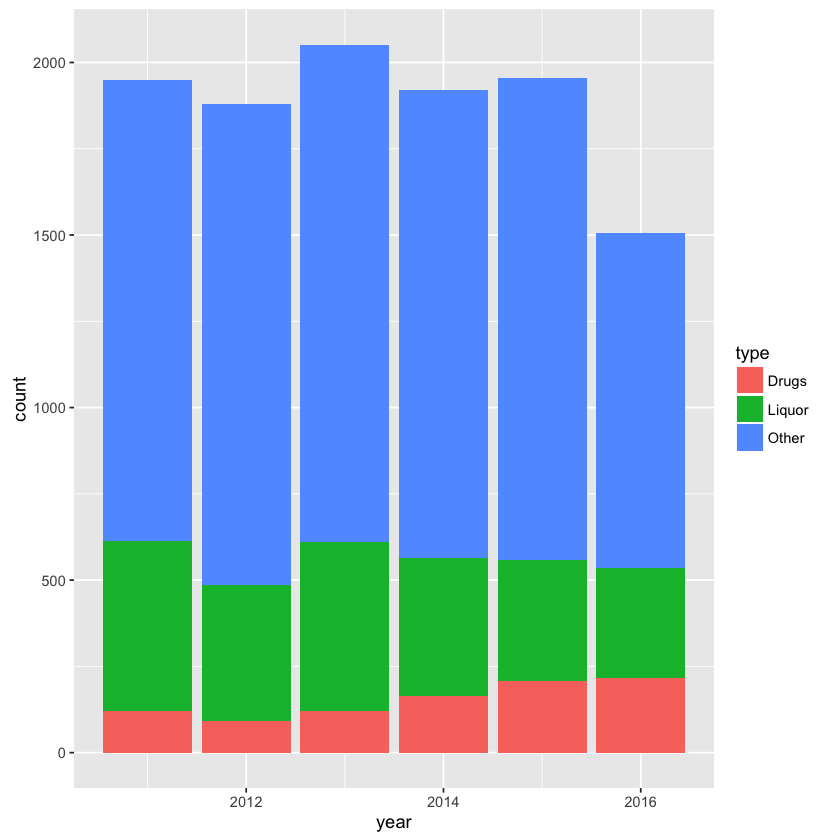

In [37]:
ggplot(drugs, aes(year, weight=count, fill=type)) + geom_bar()

In [38]:
pctdrugs <- mutate(drugs, Percent = (count / total)*100)

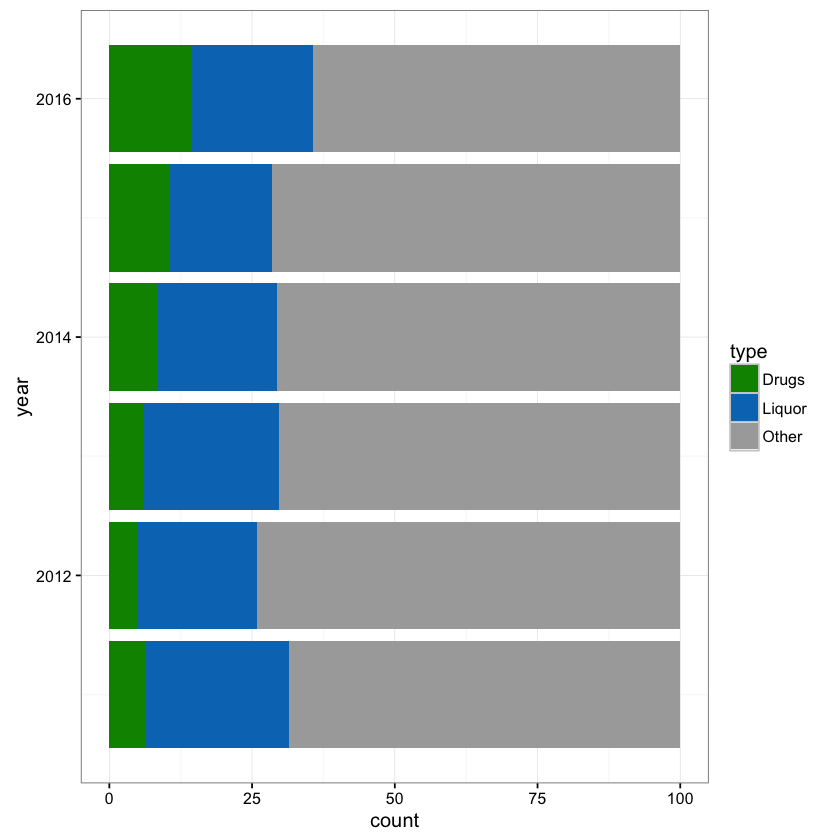

In [47]:
ggplot(pctdrugs, aes(year, weight=Percent, fill=type)) + geom_bar() + coord_flip() + scale_fill_manual(values=c("#009000", "#0077BE", "#A9A9A9")) + theme_bw()

In [48]:
ggsave("drugs.pdf", device="pdf")

Saving 7 x 7 in image
